In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from PIL import Image  
import PIL  

In [2]:
bg_image_path = "./sample_background/"
fg_image_path = "./sample_foreground/"

In [18]:
def image_preprocess(path,size = (128,128),channels=3,flip=False):
    if channels == 3:
        image = cv2.imread(path)
        image_RGB = image[:,:,::-1]
    elif channels == 4:
        image = cv2.imread(path,-1)
        image_RGB = image[:,:,[2,1,0,3]]
    img = cv2.resize(image_RGB, size, interpolation = cv2.INTER_AREA)
    if flip:
        img = cv2.flip(img, 1)
    return img

def create_forground_mask(image):
    img = image[:,:,3]
    return img

def merge_fg_bg(bg_img,fg_img,fg_img_mask,position=(0,0)):
    new_image = bg_img.copy()
    x=position[0]
    y=position[1]
    #cropping the back ground image same as the forground size
    cropped_image = new_image[x:x+32,y:y+32]
    
    #forgroung image mask  values to be converetd to 0 and1 and then reversed so that
    #keeping the forgrounds to be 0's and other regions as 1
    fg_img_mask = np.uint8(fg_img_mask/255)
    fg_img_mask_reversed = 1-fg_img_mask
    fg_img_mask_reversed
    
    #convert the mask to a 3 channel image to multiply with the 3 channel background
    img2 = cv2.merge((fg_img_mask_reversed,fg_img_mask_reversed,fg_img_mask_reversed))
    bckgrndMaskedEmptySubImg = cv2.multiply(cropped_image, img2)
    
    #adding the forground image to the background
    final_image = cv2.add(bckgrndMaskedEmptySubImg,fg_img[:,:,:3])
    
    #adding back the cropped image to the final image
    new_image[x:x+32,y:y+32] =final_image
    
    #creating the mask for final image
    bckgrndImgCopyMask = np.zeros_like(new_image[:,:,0])
    bckgrndImgCopyMask[x:(x+32), y:(y+32)] = fg_img_mask

    return new_image, bckgrndImgCopyMask

def showimage(img):
    print("Size:",img.shape)
    plt.imshow(img,cmap="gray")
    plt.show()

Size: (128, 128, 3)


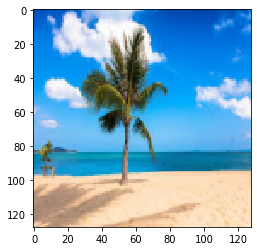

In [19]:
background_image = image_preprocess(path = bg_image_path +'beach1.jpg',size=(128,128),channels=3)
showimage(background_image)

Size: (32, 32, 4)


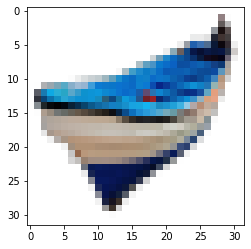

In [20]:
foreground_image = image_preprocess(path = fg_image_path +'boat1.png',size=(32,32),channels=4,flip=True)
showimage(foreground_image)

Size: (32, 32)


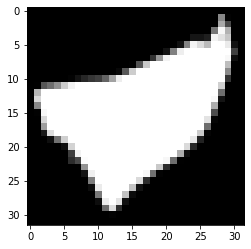

In [21]:
foreground_image_mask  = create_forground_mask(foreground_image)
showimage(foreground_image_mask)

Size: (128, 128, 3)


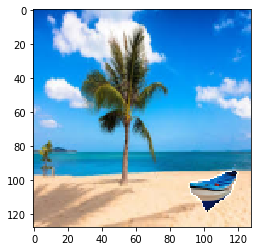

Size: (128, 128)


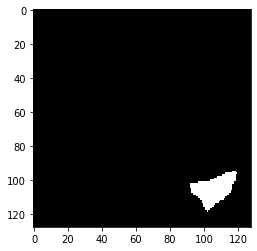

In [22]:
merged_image, mask_image = merge_fg_bg(background_image,foreground_image,foreground_image_mask,position=(90,90))
showimage(merged_image)
showimage(mask_image)

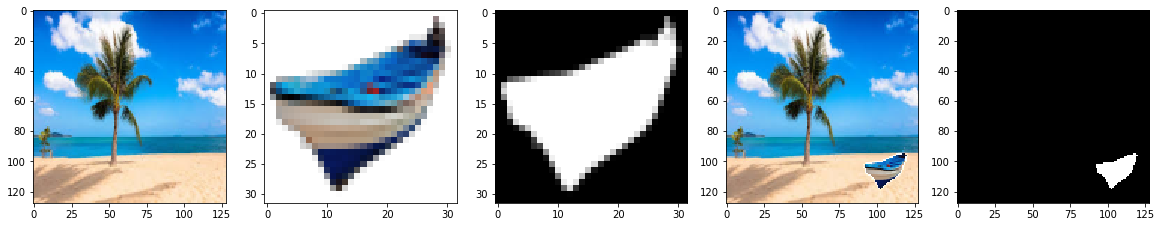

In [24]:
fig = plt.figure(figsize=(20,10))
img = background_image
ax1 = fig.add_subplot(1,5,1)
ax1.imshow(img)
img = foreground_image
ax2 = fig.add_subplot(1,5,2)
ax2.imshow(img)
img = foreground_image_mask
ax3 = fig.add_subplot(1,5,3)
ax3.imshow(img,cmap="gray") 
img = merged_image
ax4 = fig.add_subplot(1,5,4)
ax4.imshow(img) 
img = mask_image
ax5 = fig.add_subplot(1,5,5)
ax5.imshow(img,cmap="gray") 

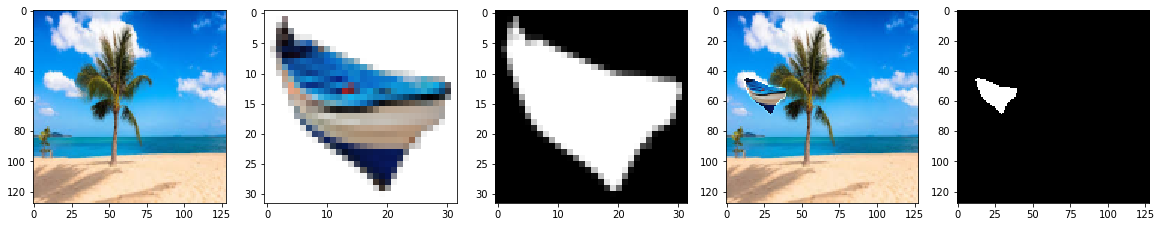

In [26]:
foreground_image = image_preprocess(path = fg_image_path +'boat1.png',size=(32,32),channels=4,flip=False)
foreground_image_mask  = create_forground_mask(foreground_image)
mereged_image, mask_image = merge_fg_bg(background_image,foreground_image,foreground_image_mask,position=(40,10))
fig = plt.figure(figsize=(20,10))
img = background_image
ax1 = fig.add_subplot(1,5,1)
ax1.imshow(img)
img = foreground_image
ax2 = fig.add_subplot(1,5,2)
ax2.imshow(img)
img = foreground_image_mask
ax3 = fig.add_subplot(1,5,3)
ax3.imshow(img,cmap="gray") 
img = mereged_image
ax4 = fig.add_subplot(1,5,4)
ax4.imshow(img) 
img = mask_image
ax5 = fig.add_subplot(1,5,5)
ax5.imshow(img,cmap="gray") 
plt.show()

### 100 Background + 100 Foreground +20 random locations

In [ ]:
plt.figure(figsize=(40,20))
i=1
for pos in range(20):
    x = randint(0, 128-32)
    y = randint(0, 128-32)
#     print("position: (%s,%s)"%(x,y))
    
    mereged_image,mask_image = merge_fg_bg(background_image,foreground_image,foreground_image_mask,position=(x,y))
    im = Image.fromarray(mereged_image)
    im.save("./sample_train/"+"train_"+str(pos)+".jpg")
    plt.imsave("./sample_mask/"+"train_"+str(pos)+".jpg",mask_image, cmap='gray')

#     print(i)
    plt.subplot(4,10,i)
    plt.title("position: (%s,%s)"%(x,y))
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.imshow(mereged_image)
    
    plt.subplot(4,10,i+1)
    plt.title("position: (%s,%s)"%(x,y))
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.imshow(mask_image,cmap="gray")
    i=i+2
    


In [36]:
a = np.array([1, 1, 1])
b = np.array([2, 2, 2])
c = np.array([3, 3, 3])
d = np.vstack((a, b))
print(d)
np.vstack((c,d))


[[1 1 1]
 [2 2 2]]


array([[3, 3, 3],
       [1, 1, 1],
       [2, 2, 2]])

In [71]:
img_list = []
mask_list = []
for pos in range(10):
    x = randint(0, 128-32)
    y = randint(0, 128-32)    
    mereged_image,mask_image = merge_fg_bg(background_image,foreground_image,foreground_image_mask,position=(x,y))
    img_list.append(mereged_image)
    mereged_image_stack = np.stack((img_list))
    mask_list.append(mask_image)
    mask_image_stack = np.stack((mask_list))

In [72]:
mereged_image_stack.shape

(10, 128, 128, 3)

In [73]:
mask_image_stack.shape

(10, 128, 128)